In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 0. Get Data
- We're going to analyze the results of a TypeForm survey called _Skills & Topics Addition Request_ (found in _Talent - Training & Ops_)

### Retrieve

First, let's check what directory we're in:

In [3]:
os.getcwd()

'/Users/abelerman/projects/math_class'

Now, we'll create a new _variable_ to hold the name of our file:

In [4]:
file_name = "responses.csv"

Let's confirm that we have this file in our current directory:

In [5]:
file_name in os.listdir()

True

Great, now we'll set ourselves up to read the file:

In [6]:
data_path = os.path.join(os.getcwd(), file_name)

In [7]:
data_path

'/Users/abelerman/projects/math_class/responses.csv'

And, let's read it:

In [8]:
df = pd.read_csv(data_path)

### Quick Inspection

Let's look at the number of `(rows, columns)` in our `DataFrame`:

In [9]:
df.shape

(159, 7)

We can inspect the first 5 rows to make sure everything looks OK:

In [10]:
df.head()

,#,"Are you requesting a ""skills"" or ""topics"" addition?",What skill would you like added as an option to the Contently portfolio page?,What topic would you like added as an option to the Contently portfolio page?,Start Date (UTC),Submit Date (UTC),Network ID
0,zujkfuj5fzre3sf67r3jkvzujkfujx6i,Topics,NaN,Website Copy,9/20/19 18:12,9/20/19 18:13,9610a29ede
1,wo614cjkztith3rvnwo61h15g6181fjk,Topics,NaN,Productivity,8/19/19 21:37,8/19/19 21:38,4359f28a41
2,dmtz5asojcvh2e226y3ukdmtz5avj9j4,Topics,NaN,Recruiting & Staffing,8/16/19 18:35,8/16/19 18:36,73c1ce737b
3,yul4g6lswbeyu77yul4g79iyvi6fre8a,Topics,NaN,Human Resources,8/16/19 18:34,8/16/19 18:35,73c1ce737b
4,7yquunh69uoem3ijw67yquunts666tsa,Skills,Website page,NaN,8/16/19 18:34,8/16/19 18:34,73c1ce737b


In [11]:
df.columns

Index(['#', 'Are you requesting a "skills" or "topics" addition?',
       'What skill would you like added as an option to the Contently portfolio page?',
       'What topic would you like added as an option to the Contently portfolio page?',
       'Start Date (UTC)', 'Submit Date (UTC)', 'Network ID'],
      dtype='object')

Let's check for duplicates:

In [12]:
df.duplicated().sum()

0

And missing values:

In [13]:
df.isnull().sum()

#                                                                                  0
Are you requesting a "skills" or "topics" addition?                                0
What skill would you like added as an option to the Contently portfolio page?    114
What topic would you like added as an option to the Contently portfolio page?     45
Start Date (UTC)                                                                   0
Submit Date (UTC)                                                                  0
Network ID                                                                         0
dtype: int64

### Cleanup

Let's clean up our column names to make them easier to use:

In [14]:
df = df.rename(columns={
        "#": "num",
        'Are you requesting a "skills" or "topics" addition?': "skill_or_topic",
        "What skill would you like added as an option to the Contently portfolio page?": "skill_to_add",
        "What topic would you like added as an option to the Contently portfolio page?": "topic_to_add",
        "Start Date (UTC)": "start_date",
        "Submit Date (UTC)": "submit_date",
        "Network ID": "network_id"
})

In [15]:
df.head()

,num,skill_or_topic,skill_to_add,topic_to_add,start_date,submit_date,network_id
0,zujkfuj5fzre3sf67r3jkvzujkfujx6i,Topics,NaN,Website Copy,9/20/19 18:12,9/20/19 18:13,9610a29ede
1,wo614cjkztith3rvnwo61h15g6181fjk,Topics,NaN,Productivity,8/19/19 21:37,8/19/19 21:38,4359f28a41
2,dmtz5asojcvh2e226y3ukdmtz5avj9j4,Topics,NaN,Recruiting & Staffing,8/16/19 18:35,8/16/19 18:36,73c1ce737b
3,yul4g6lswbeyu77yul4g79iyvi6fre8a,Topics,NaN,Human Resources,8/16/19 18:34,8/16/19 18:35,73c1ce737b
4,7yquunh69uoem3ijw67yquunts666tsa,Skills,Website page,NaN,8/16/19 18:34,8/16/19 18:34,73c1ce737b


Do we need all of our columns? Let's start by seeing if the `num` column is unique:

In [16]:
df.num.nunique() == df.shape[0]

True

We very well might need, at some point, this `num` column, so that we could, hypotethically, link our analysis to some other data. However, in this context, it's extra information, and it's ugly, so let's drop it:

In [17]:
df = df.drop("num", axis=1)

In [18]:
df.network_id.nunique() == df.shape[0]

False

In [19]:
df.network_id.nunique()

67

In [20]:
df.network_id.value_counts()[:5]

1a89589693    17
62c71e8d27    16
c411ec3ea3     9
6bdb42e879     6
cf82999d32     6
Name: network_id, dtype: int64

Interesting ... let's keep this one. Now, let's look at the _data type_ of each column:

In [21]:
df.dtypes

skill_or_topic    object
skill_to_add      object
topic_to_add      object
start_date        object
submit_date       object
network_id        object
dtype: object

They're all coming in as _text_ data, which is not what we want (not for the date fields, at least). Let's change that:

In [22]:
date_col_names = [c for c in df.columns if "date" in c]

In [23]:
date_col_names

['start_date', 'submit_date']

In [24]:
df[date_col_names].head()

,start_date,submit_date
0,9/20/19 18:12,9/20/19 18:13
1,8/19/19 21:37,8/19/19 21:38
2,8/16/19 18:35,8/16/19 18:36
3,8/16/19 18:34,8/16/19 18:35
4,8/16/19 18:34,8/16/19 18:34


In [25]:
for c in date_col_names:
    print(c)

start_date
submit_date


In [26]:
for c in date_col_names:
    df[c] = pd.to_datetime(df[c])

In [27]:
df.dtypes

skill_or_topic            object
skill_to_add              object
topic_to_add              object
start_date        datetime64[ns]
submit_date       datetime64[ns]
network_id                object
dtype: object

# 1. Analysis

### Skills vs. Topics

In [28]:
df.skill_or_topic.value_counts(normalize=True, dropna=False)

Topics    0.716981
Skills    0.283019
Name: skill_or_topic, dtype: float64

Same as above, but with both actual and normalized count:

In [29]:
df.skill_or_topic.value_counts(
        normalize=True, dropna=False
                 ).rename("normalized"
                 ).to_frame(
                 ).join(
                    df.skill_or_topic.value_counts(
                                        dropna=False
                                     ).rename("count"))

,normalized,count
Topics,0.716981,114
Skills,0.283019,45


Let's confirm that the field is well-populated and that its values are mutually exclusive:

In [30]:
(df.topic_to_add.isnull() & df.skill_to_add.isnull()).sum()

0

In [31]:
(df.topic_to_add.notnull() & df.skill_to_add.notnull()).sum()

0

In [32]:
df.topic_to_add.value_counts()[:10]

Marketing          6
Exercise           2
LGBT               2
parenting          2
Human Resources    2
marketing          2
Health             2
Energy             2
Data analytics     2
Nonprofit          2
Name: topic_to_add, dtype: int64

In [33]:
df.skill_to_add.value_counts()[:10]

Research              5
Producer              2
research              2
Travel writing        1
Newswriting           1
Book writing          1
Data analysis         1
travel writing        1
Expository writing    1
feature writing       1
Name: skill_to_add, dtype: int64

#### Cleaning

In [34]:
df.topic_to_add.nunique()

100

Let's lowercase all _topics_ requests:

In [35]:
df.topic_to_add = df.topic_to_add.str.lower()

In [36]:
df.topic_to_add.nunique()

95

For giggles, what if we only consider the first 5 characters of each _topics_ request?

In [37]:
df.topic_to_add.str[:5].nunique()

82

In [42]:
df.topic_to_add.str[:5].value_counts()[:10]

marke    8
credi    6
healt    4
data     3
nonpr    3
paren    3
lgbt     2
energ    2
urban    2
human    2
Name: topic_to_add, dtype: int64

Same for _skills_:

In [38]:
df.skill_to_add.nunique()

39

In [39]:
df.skill_to_add = df.skill_to_add.str.lower()

In [40]:
df.skill_to_add.nunique()

36

In [41]:
df.skill_to_add.str[:5].nunique()

34

Let's confirm that we have no overlap between _skills_ and _topics_:

In [43]:
set(df.skill_to_add.values) & set(df.topic_to_add.values)

{nan}

#### Plot

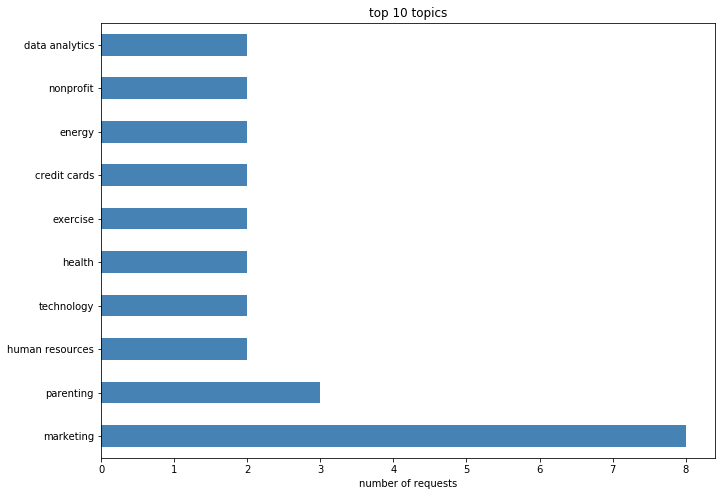

In [44]:
ax = df.topic_to_add.value_counts()[:10].plot.barh(
                                                figsize=(11, 8),
                                                color="steelblue")

xlab = ax.set_xlabel("number of requests")
t = ax.title.set_text("top 10 topics")

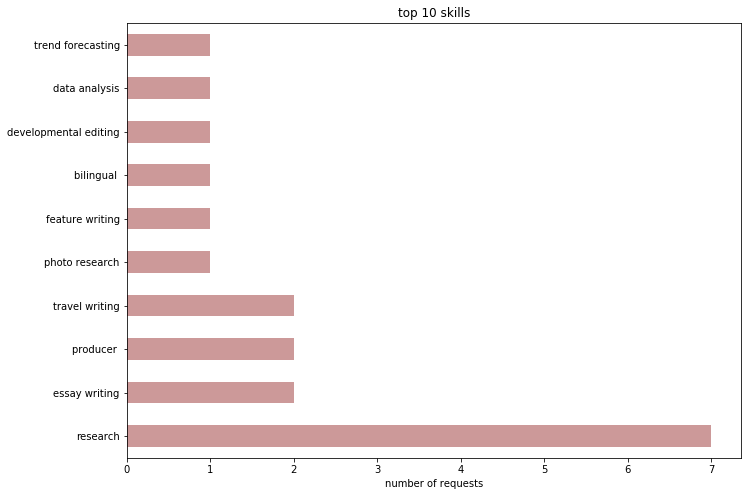

In [45]:
ax = df.skill_to_add.value_counts()[:10].plot.barh(
                                                figsize=(11, 8),
                                                color="maroon",
                                                alpha=.4)

xlab = ax.set_xlabel("number of requests")
t = ax.title.set_text("top 10 skills")

### `time_to_completion`
- let's construct a new column that's the difference of `submit_date` and `start_date`

In [46]:
df["time_to_completion"] = (df.submit_date - df.start_date).dt.total_seconds()

In [47]:
df.time_to_completion.describe().to_frame()

,time_to_completion
count,159.000000
mean,204.905660
std,2021.343978
min,0.000000
25%,0.000000
50%,0.000000
75%,60.000000
max,25500.000000


We can see that, for at least 50% of respondants, the survey was completed in under a minute. Let's confirm the exact %:

In [49]:
(df.time_to_completion == 0).sum() / df.shape[0]

0.5157232704402516

We can plot a _histogram_ to look at this data further:

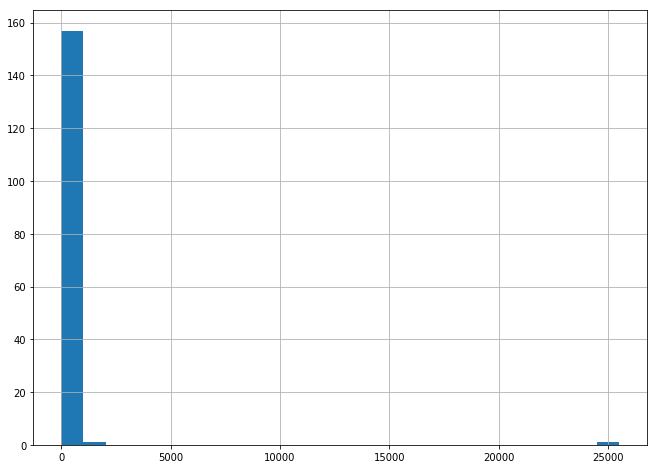

In [91]:
ax = df.time_to_completion.hist(bins=25, figsize=(11, 8))

Let's look only where our data is greater than 0:

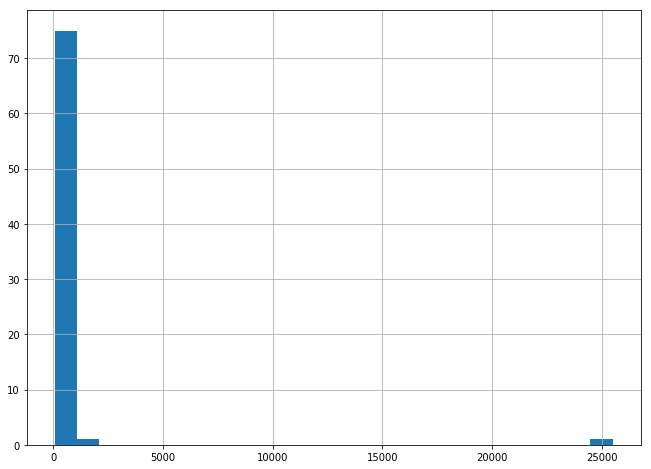

In [92]:
ax = df.loc[df.time_to_completion > 0, "time_to_completion"].hist(bins=25, figsize=(11, 8))

And finally, where our data is greater than 0 _and_ less than 1000:

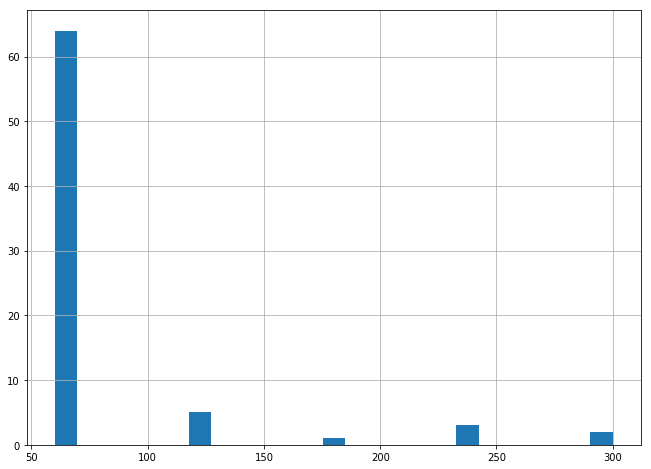

In [51]:
ax = df.loc[
    (df.time_to_completion > 0)
    &
    (df.time_to_completion < 1000), "time_to_completion"
            ].hist(bins=25, figsize=(11, 8))

# 2. Export Report
- let's say Pearl has asked for a report on the top _skills_ and _topics_
- we can programmatically write this to Excel

In [52]:
top_skills = df.skill_to_add.value_counts(
                                    normalize=True
                              ).rename("normalized"
                              ).to_frame(
                              ).join(
                                    df.skill_to_add.value_counts(
                                     ).rename("count"))

In [53]:
top_skills.head()

,normalized,count
research,0.155556,7
essay writing,0.044444,2
producer,0.044444,2
travel writing,0.044444,2
photo research,0.022222,1


In [54]:
top_topics = df.topic_to_add.value_counts(
                                    normalize=True
                              ).rename("normalized"
                              ).to_frame(
                              ).join(
                                    df.topic_to_add.value_counts(
                                     ).rename("count"))

In [55]:
top_topics.head()

,normalized,count
marketing,0.070175,8
parenting,0.026316,3
human resources,0.017544,2
technology,0.017544,2
health,0.017544,2


In [56]:
export_file_name = "report.xlsx"

In [57]:
export_path = os.path.join(os.getcwd(), export_file_name)

In [58]:
with pd.ExcelWriter(export_path) as xl:
    top_topics.to_excel(xl, sheet_name="topics")
    top_skills.to_excel(xl, sheet_name="skills")